<a href="https://colab.research.google.com/github/miftahuraziz/Submission-Proyek-Analisis-Data-Dicoding/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Bike Sharing Dataset
- Nama: Miftahur Sidq Aziz
- Email: miftahuraziz@gmail.com
- Id Dicoding: miftahuraziz

## Menentukan Pertanyaan Bisnis

1. Bagaimana performa penyewaan sepeda oleh perusahaan dalam beberapa tahun terakhir?
2. Pada jam berapa penyewaan sepeda paling banyak dan paling sedikit dilakukan?
3. Pada musim apa penyewaan sepeda paling banyak dilakukan?

## Menyiapkan semua library yang dibutuhkan

In [42]:
#import semua library yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [43]:
#Memuat tabel day
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [44]:
#Memuat tabel hour
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [45]:
#Memeriksa tipe data data dari tiap kolom yang terdapat dalam hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [46]:
#Memeriksa tipe data data dari tiap kolom yang terdapat dalam day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [47]:
#Memeriksa keberadaan missing value di dataset hour_df
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [48]:
#Memeriksa keberadaan missing value di dataset hour_df
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak ada missing value di dataframe hour_df dan day_df

In [49]:
#Memeriksa duplikasi data pada dataframe
print("Jumlah duplikasi hour_df: ", hour_df.duplicated().sum())
print("Jumlah duplikasi day_df: ", day_df.duplicated().sum())

Jumlah duplikasi hour_df:  0
Jumlah duplikasi day_df:  0


Tidak ada duplikasi data di dataframe hour_df dan day_df

In [50]:
#Memeriksa statistik kolom numerik yang terdapat di dalam day_df
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [51]:
#Memeriksa statistik kolom numerik yang terdapat di dalam hour_df
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

1. Menghapus kolom instant dan workingday karena tidak diperlukan
2. Mengubah tipe data int menjadi category pada kolom 'season', 'mnth', 'holiday', 'weekday', 'weathersit'
3. Mengubah tipe data dteday yang tadinya object menjadi datetime
4. Mengganti nama kolom agar lebih mudah dibaca
5. Mengkonversi data category agar mudah dipahami
6. Menambahkan kolom baru bernama category_days untuk menunjukkan hari tersebut weekday atau weekend


In [52]:
#Menghapus kolom instant dan workingday
hour_df.drop(['instant', 'workingday'], axis = 1, inplace= True)
day_df.drop(['instant', 'workingday'], axis = 1, inplace= True)

In [53]:
#Mengubah tipe data int menjadi category pada kolom 'season', 'mnth', 'holiday', 'weekday', 'weathersit'
columns = ['season', 'mnth', 'holiday', 'weekday', 'weathersit']

for column in columns:
    day_df[column] =  day_df[column].astype("category")
    hour_df[column] =  hour_df[column].astype("category")

In [54]:
#Mengubah tipe data dteday yang tadinya object menjadi datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [55]:
#Mengganti nama kolom agar lebih mudah dibaca di dataset day_df
day_df.rename(columns={'dteday':'date_time','yr':'year','mnth':'month','weekday':'week_day','weathersit':'weather_situation', 'windspeed':'wind_speed','cnt':'total_rent','hum':'humidity'},inplace=True)

In [56]:
#Mengganti nama kolom agar lebih mudah dibaca di dataset hour_df
hour_df.rename(columns={'dteday':'date_time','yr':'year','mnth':'month','hr':'hour','weekday':'week_day','weathersit':'weather_situation', 'windspeed':'wind_speed','cnt':'total_rent','hum':'humidity'},inplace=True)

In [57]:
#Mengkonversi data category agar mudah dipahami
#Konversi season menjadi: 1:Spring, 2:Summer, 3:Fall, 4:Winter
day_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)
hour_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)

#Konversi month menjadi: 1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec
day_df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
hour_df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)

#Konversi weather_situation menjadi: 1:Clear, 2:Misty, 3:Light_RainSnow 4:Heavy_RainSnow
day_df.weather_situation.replace((1,2,3,4), ('Clear','Misty','Light Rain/Snow','Heavy Rain/Snow'), inplace=True)
hour_df.weather_situation.replace((1,2,3,4), ('Clear','Misty','Light Rain/Snow','Heavy Rain/Snow'), inplace=True)

#Konversi week_day menjadi: 0:Sun, 1:Mon, 2:Tue, 3:Wed, 4:Thu, 5:Fri, 6:Sat
day_df.week_day.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)
hour_df.week_day.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)

#Konversi year menjadi: 0:2011, 1:2012
day_df.year.replace((0,1), ('2011','2012'), inplace=True)
hour_df.year.replace((0,1), ('2011','2012'), inplace=True)

In [58]:
#Menambahkan kolom baru bernama category_days untuk menunjukkan hari tersebut weekday atau weekend
week_day = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
def get_category_days(week_day):
    if week_day in ["Saturday", "Sunday"]:
        return "Weekend"
    else:
        return "Weekday"

hour_df["category_days"] = hour_df["week_day"].apply(get_category_days)
day_df["category_days"] = day_df["week_day"].apply(get_category_days)

In [59]:
day_df.head()

,date_time,season,year,month,holiday,week_day,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,total_rent,category_days
0,2011-01-01,Spring,2011,Jan,0,Saturday,Misty,0.344167,0.363625,0.805833,0.160446,331,654,985,Weekend
1,2011-01-02,Spring,2011,Jan,0,Sunday,Misty,0.363478,0.353739,0.696087,0.248539,131,670,801,Weekend
2,2011-01-03,Spring,2011,Jan,0,Monday,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Weekday
3,2011-01-04,Spring,2011,Jan,0,Tuesday,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Weekday
4,2011-01-05,Spring,2011,Jan,0,Wednesday,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600,Weekday


In [60]:
hour_df.head()

,date_time,season,year,month,hour,holiday,week_day,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,total_rent,category_days
0,2011-01-01,Spring,2011,Jan,0,0,Saturday,Clear,0.24,0.2879,0.81,0.0,3,13,16,Weekend
1,2011-01-01,Spring,2011,Jan,1,0,Saturday,Clear,0.22,0.2727,0.80,0.0,8,32,40,Weekend
2,2011-01-01,Spring,2011,Jan,2,0,Saturday,Clear,0.22,0.2727,0.80,0.0,5,27,32,Weekend
3,2011-01-01,Spring,2011,Jan,3,0,Saturday,Clear,0.24,0.2879,0.75,0.0,3,10,13,Weekend
4,2011-01-01,Spring,2011,Jan,4,0,Saturday,Clear,0.24,0.2879,0.75,0.0,0,1,1,Weekend



**Sudah dikerjakan:**
* Menghapus kolom instant dan workingday
* Mengubah tipe data dteday sudah menjadi datetime
* Mengubah tipe data int pada season, mnth, holiday, weekday, workingday, weathersit menjadi tipe data category
* Mengganti nama kolom agar lebih mudah dibaca
* Mengonversi isi kolom agar mudah dipahami
* Menambahkan kolom baru bernama category_days yang berisi kategori hari (weekend atau weekdays)



## Exploratory Data Analysis (EDA)

### Explore Data day_df

In [61]:
#Melihat rangkuman statistik dari data day_df
day_df.describe(include="all")

,date_time,season,year,month,holiday,week_day,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,total_rent,category_days
count,731,731,731,731,731.0,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731
unique,NaN,4,2,12,2.0,7,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,Fall,2012,Jan,0.0,Sunday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Weekday
freq,NaN,188,366,62,710.0,105,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,521
mean,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837,NaN
min,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,NaN
25%,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000,NaN
50%,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000,NaN
75%,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000,NaN
max,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000,NaN


In [62]:
#Penyewaan berdasarkan season
day_df.groupby(by="season").total_rent.sum().sort_values(ascending=False).reset_index().head(10)

,season,total_rent
0,Fall,1061129
1,Summer,918589
2,Winter,841613
3,Spring,471348


Berdasarkan pengelompokan di atas, didapatkan informasi bahwa penyewaan sepeda paling banyak dilakukan pada musim Fall

### Explore Data hour_df

In [63]:
#Melihat rangkuman statistik dari data hour_df
hour_df.describe(include="all")

,date_time,season,year,month,hour,holiday,week_day,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,total_rent,category_days
count,17379,17379,17379,17379,17379.000000,17379.0,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379
unique,NaN,4,2,12,NaN,2.0,7,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,Fall,2012,May,NaN,0.0,Saturday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Weekday
freq,NaN,4496,8734,1488,NaN,16879.0,2512,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12365
mean,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,NaN
min,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN
25%,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,NaN
50%,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,NaN
75%,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,NaN
max,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,NaN


Berdasarkan rangkuman statistik di atas, kita akan memperoleh informasi jumlah pelanggan sebanyak 17379 dan rata-rata penyewaan sepeda terjadi pada jam 11.54

In [64]:
#Penyewaan berdasarkan jam
hour_df.groupby(by="hour").agg({
    "total_rent": ["sum"]
})

,total_rent
,sum
hour,
0,39130
1,24164
2,16352
3,8174
4,4428
5,14261
6,55132
7,154171


Berdasarkan pivot table di atas, dapat diketahui bahwa penyewaan sepeda paling banyak dilakukan pada jam 17.00 sedangkan penyewaan sepeda yang paling sedikit dilakukan pada jam 04.00

## Visualization & Explanatory Analysis

1. Bagaimana performa penyewaan sepeda oleh perusahaan dalam beberapa tahun terakhir?
2. Pada jam berapa penyewaan sepeda paling banyak dan paling
sedikit dilakukan?
3. Pada musim apa penyewaan sepeda paling banyak dilakukan?



### Pertanyaan 1: Bagaimana performa penyewaan sepeda oleh perusahaan dalam beberapa tahun terakhir?

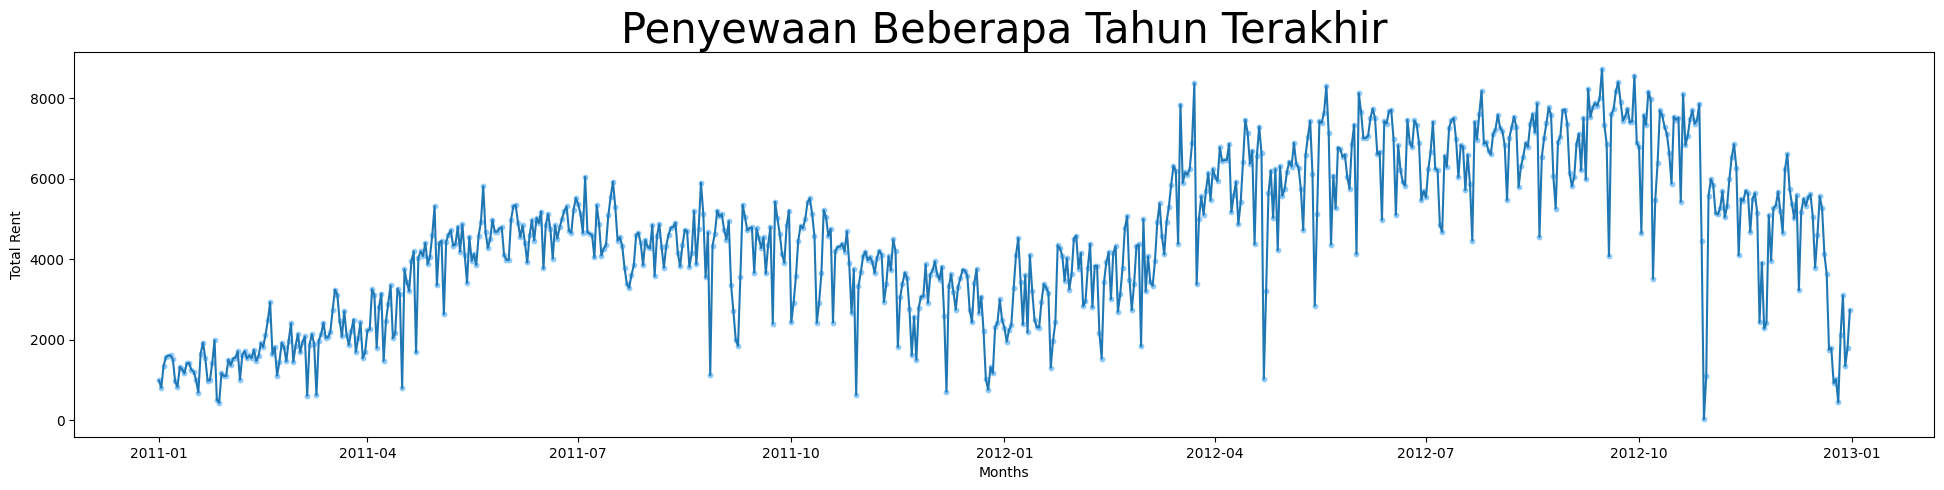

In [65]:
#Mebuat figure dengan ukuran (24, 5)
plt.figure(figsize=(24, 5))

#Menghitung jumlah pelanggan maksimum per bulan
monthly_counts = day_df['total_rent'].groupby(day_df['date_time']).max()

#Membuat scatter plot untuk jumlah pelanggan maksimum per bulan, dengan warna biru dan marker 'o'
plt.scatter(monthly_counts.index, monthly_counts.values, c="#90CAF9", s=10, marker='o')

#Membuat line plot untuk jumlah pelanggan maksimum per bulan
plt.plot(monthly_counts.index, monthly_counts.values)

#Penamaan untuk sumbu x
plt.xlabel('Months')

#Penamaan untuk sumbu y
plt.ylabel('Total Rent')

#Membuat judul
plt.title('Penyewaan Beberapa Tahun Terakhir', fontsize=30)

#Menampilkan plot
plt.show()

**Berdasarkan grafik di atas, jumlah penyewaan sepeda terbanyak terjadi pada bulan September 2012. Selain itu, terdapat Penurunan jumlah penyewaan sepeda yang cukup signifikan yaitu pada bulan November ke Desember 2012**

### Pertanyaan 2: Pada jam berapa penyewaan sepeda paling banyak dan paling sedikit dilakukan?

In [66]:
#Melakukan grouping terhadap hour dan total_rent
sum_order_items_df = hour_df.groupby("hour").total_rent.sum().sort_values(ascending=False).reset_index()

<ipython-input-67-4119b325f0d6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="hour", y="total_rent", data=sum_order_items_df.head(5), palette=["#D3D3D3", "#D3D3D3", "#90CAF9", "#D3D3D3", "#D3D3D3"], ax=ax[0])
<ipython-input-67-4119b325f0d6>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="hour", y="total_rent", data=sum_order_items_df.sort_values(by="hour", ascending=True).head(5), palette=["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3","#90CAF9"], ax=ax[1])


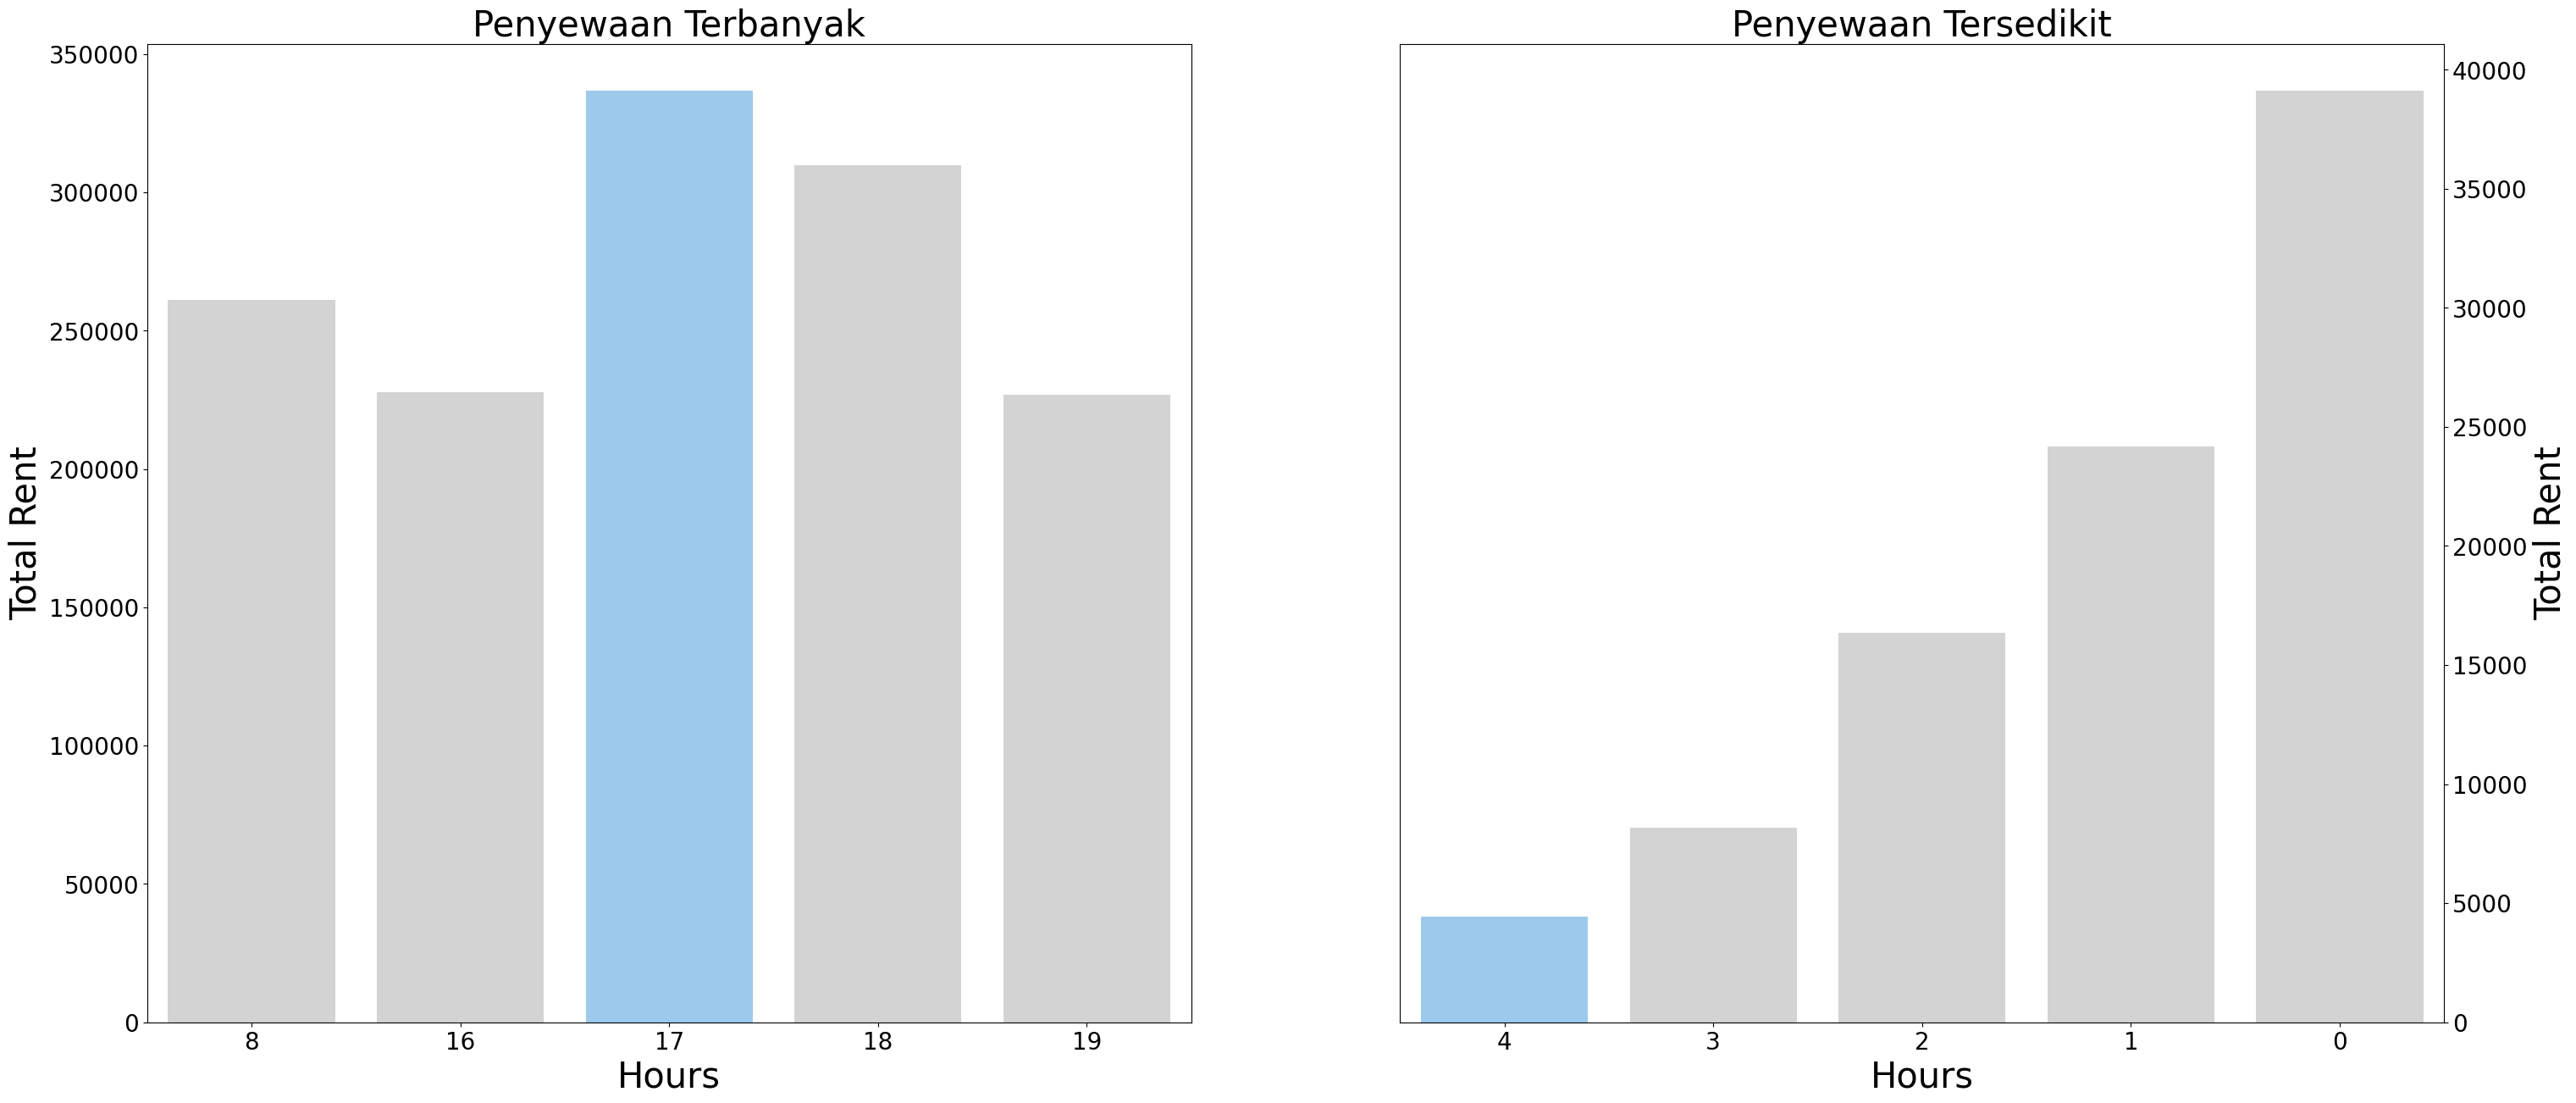

In [67]:
#Membuat bar chart untuk melihat perbedaan penyewaan sepeda berdasarkan jam
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(35, 15))

#Membuat barplot untuk penyewaan sepeda terbanyak
sns.barplot(x="hour", y="total_rent", data=sum_order_items_df.head(5), palette=["#D3D3D3", "#D3D3D3", "#90CAF9", "#D3D3D3", "#D3D3D3"], ax=ax[0])

#Mengatur label dan judul untuk subplot pertama
ax[0].set_ylabel("Total Rent",  fontsize=30)
ax[0].set_xlabel("Hours", fontsize=30)
ax[0].set_title("Penyewaan Terbanyak", loc="center", fontsize=30)
ax[0].tick_params(axis='y', labelsize=20)
ax[0].tick_params(axis='x', labelsize=20)

#Membuat barplot untuk penyewaan sepeda tersedikit
sns.barplot(x="hour", y="total_rent", data=sum_order_items_df.sort_values(by="hour", ascending=True).head(5), palette=["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3","#90CAF9"], ax=ax[1])

#Mengatur label dan judul untuk subplot kedua
ax[1].set_ylabel("Total Rent",  fontsize=30)
ax[1].set_xlabel("Hours",  fontsize=30)
ax[1].set_title("Penyewaan Tersedikit", loc="center", fontsize=30)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].tick_params(axis='y', labelsize=20)
ax[1].tick_params(axis='x', labelsize=20)

#Menampilkan plot
plt.show()

**Berdasarkan grafik di atas, penyewaan sepeda paling banyak dilakukan pada jam 17:00. Sedangkan, penyewaan sepeda paling sedikit dilakukan pada jam 04:00**

### Pertanyaan 3: Pada musim apa penyewaan sepeda paling banyak dilakukan?

<ipython-input-68-5ae1df49750d>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


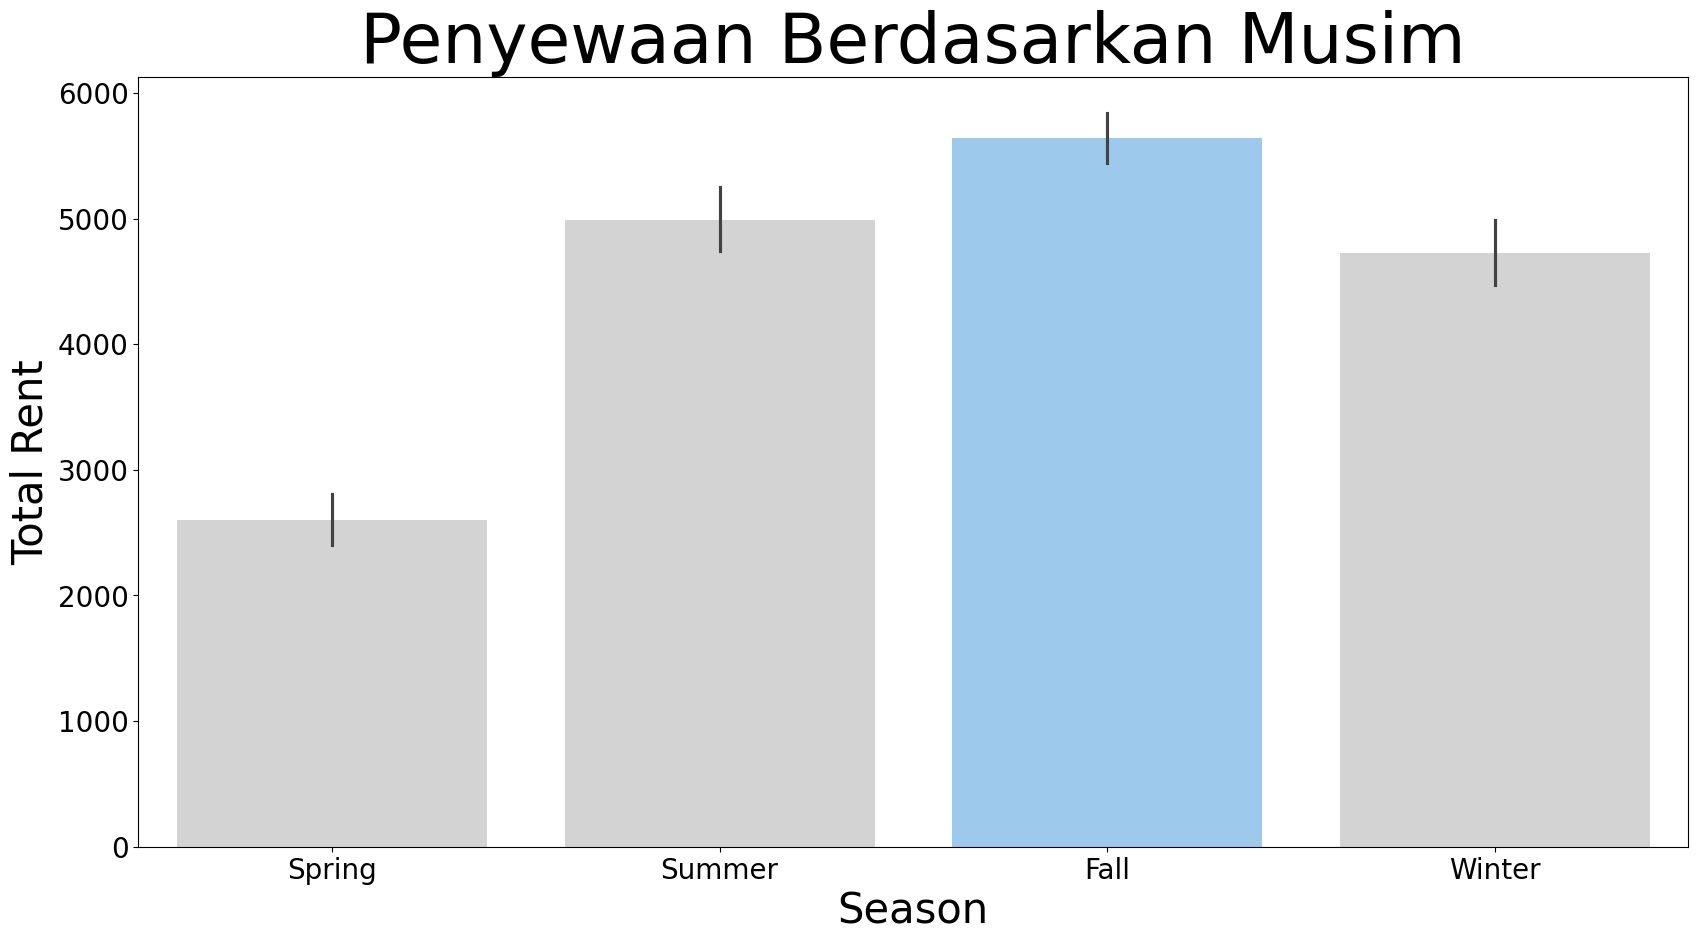

In [68]:
#Mengatur warna
colors = ["#D3D3D3", "#D3D3D3", "#90CAF9", "#D3D3D3"]

#Membuat subplot dengan 1 baris dan 1 kolom, dengan ukuran (20, 10)
fig, ax = plt.subplots(figsize=(20, 10))

#Buat barplot untuk y="total_rent" dan x="season", menggunakan data=day_df
sns.barplot(
        y="total_rent",
        x="season",
        data=day_df.sort_values(by="season", ascending=False),
        palette=colors,
        ax=ax
    )
#Mengatur judul, label y dan x, serta tick params untuk subplot tersebut
ax.set_title("Penyewaan Berdasarkan Musim", loc="center", fontsize=50)
ax.set_ylabel("Total Rent", fontsize=30)
ax.set_xlabel("Season", fontsize=30)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

# menampilkan plot
plt.show()

**Berdasarkan grafik di atas, penyewaan sepeda paling banyak dilakukan pada musim Fall (musim gugur) dan paling banyak kedua pada musim Summer (musim panas)**

## Conclusion

- Conclusion Pertanyaan 1: Bagaimana performa penyewaan sepeda oleh perusahaan dalam beberapa tahun terakhir?

  **Berdasarkan analisis dan visualisasi yang telah dilakukan, jumlah penyewaan terbanyak terjadi pada bulan September 2012. Selain itu, terdapat Penurunan jumlah penyewaan yang cukup signifikan yaitu pada bulan November ke Desember 2012**

- Conclusion Pertanyaan 2: Pada jam berapa penyewaan sepeda paling banyak dan paling sedikit dilakukan?

  **Berdasarkan analisis dan visualisasi yang telah dilakukan, penyewaan sepeda paling banyak dilakukan pada jam 17:00. Sedangkan, penyewaan sepeda paling sedikit dilakukan pada jam 04:00**

- Conclusion Pertanyaan 3: Pada musim apa penyewaan sepeda paling banyak dilakukan?

  **Berdasarkan analisis dan visualisasi yang telah dilakukan, penyewaan sepeda paling banyak dilakukan pada musim Fall (musim gugur)**